In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
### Data preprocessing on train data.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [21]:
df_train['Self_Employed'].mode()

0    No
dtype: object

In [6]:
df_train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
df_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [22]:
df_train['Dependents'].mode()

0    0
dtype: object

In [11]:
df_train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [12]:
df_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
df_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [14]:
df_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [15]:
df_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [16]:
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [17]:
df_train.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [18]:
df_train.isnull().sum().sort_values(ascending = False)/len(df_train)*100

Credit_History       8.143322
Self_Employed        5.211726
LoanAmount           3.583062
Dependents           2.442997
Loan_Amount_Term     2.280130
Gender               2.117264
Married              0.488599
Loan_Status          0.000000
Property_Area        0.000000
CoapplicantIncome    0.000000
ApplicantIncome      0.000000
Education            0.000000
Loan_ID              0.000000
dtype: float64

In [19]:
null_values = pd.DataFrame(df_train.isnull().sum().sort_values(ascending = False)).reset_index()
null_values.columns = ['column_name','values']
percent = pd.DataFrame(df_train.isnull().sum().sort_values(ascending = False)/len(df_train)*100).reset_index()
percent.columns = ['column_name','percent']
percent_1 = pd.DataFrame(percent.loc[:,'percent'])


In [20]:
null_df = pd.concat([null_values,percent_1],axis = 1)
null_df

,column_name,values,percent
0,Credit_History,50,8.143322
1,Self_Employed,32,5.211726
2,LoanAmount,22,3.583062
3,Dependents,15,2.442997
4,Loan_Amount_Term,14,2.280130
5,Gender,13,2.117264
6,Married,3,0.488599
7,Loan_Status,0,0.000000
8,Property_Area,0,0.000000
9,CoapplicantIncome,0,0.000000


In [648]:
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].mean())
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode())
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].mode())
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].filna(df_train['Loan_Amount_Term'].mode())
#df_train['Gender'] = df_train['Gender'].fillna(method = 'ffill')
df_train['Married'] = df_train['Married'].fillna(method = 'bfill')


In [649]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [650]:
df_train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [651]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [652]:
df_train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [653]:
## continous variables:
features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
normalized_df = df_train[features]
normalized_df = normalized_df - normalized_df.mean()/normalized_df.std()

In [654]:
## mapping (married,self employed,loan status):
## dependents,loan_amount_term
df_train['Married'] = df_train['Married'].map({'Yes': 1,'No': 0})
df_train['Self_Employed'] = df_train['Self_Employed'].map({'Yes': 1,'No': 0})
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 1,'N': 0})
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].map({360.0 : "30 Years",180.0:'15 Years',480.0:'40 Years',300.0:'25 Years',84.0:'7 Years',240.0:'20 Years',120.0:'10 Years',36.0:'3 Years',60.0:'5 Years',12.0:'1 Year'})

In [655]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null int64
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null object
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(3), int64(4), object(6)
memory usage: 62.4+ KB


In [656]:
df_train = df_train.replace({'Dependents':{'0':'dep_None','2':'dep_Two','1':'dep_One','3+':'dep_More_than_three'}})

In [657]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null int64
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null object
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(3), int64(4), object(6)
memory usage: 62.4+ KB


In [658]:
## dummy variables(gender,dependents,education,Loan_Amount_Term,Property_Area)
gen = pd.get_dummies(df_train['Gender'],drop_first = True)
dep = pd.get_dummies(df_train['Dependents'],drop_first = True)
ed = pd.get_dummies(df_train['Education'],drop_first = True)
lat = pd.get_dummies(df_train['Loan_Amount_Term'],drop_first = True)
pa = pd.get_dummies(df_train['Property_Area'],drop_first = True)

df_train = pd.concat([df_train,gen,dep,ed,lat,pa],axis = 1)

In [659]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 29 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null int64
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null object
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
Male                 614 non-null uint8
dep_None             614 non-null uint8
dep_One              614 non-null uint8
dep_Two              614 non-null uint8
Not Graduate         614 non-null uint8
10 Years             614 non-null uint8
15 Years             614 non-null uint8
20 Years             614 non-null uint8
25 Years             614 non-null uint8
3 Y

In [660]:
df_train = df_train.drop(['Gender','Dependents','Education','Loan_Amount_Term','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount'],axis = 1)


In [661]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
Loan_ID           614 non-null object
Married           614 non-null int64
Self_Employed     614 non-null int64
Credit_History    614 non-null float64
Loan_Status       614 non-null int64
Male              614 non-null uint8
dep_None          614 non-null uint8
dep_One           614 non-null uint8
dep_Two           614 non-null uint8
Not Graduate      614 non-null uint8
10 Years          614 non-null uint8
15 Years          614 non-null uint8
20 Years          614 non-null uint8
25 Years          614 non-null uint8
3 Years           614 non-null uint8
30 Years          614 non-null uint8
40 Years          614 non-null uint8
5 Years           614 non-null uint8
7 Years           614 non-null uint8
Semiurban         614 non-null uint8
Urban             614 non-null uint8
dtypes: float64(1), int64(3), object(1), uint8(16)
memory usage: 33.7+ KB


In [662]:
df_train = pd.concat([df_train,normalized_df],axis = 1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 24 columns):
Loan_ID              614 non-null object
Married              614 non-null int64
Self_Employed        614 non-null int64
Credit_History       614 non-null float64
Loan_Status          614 non-null int64
Male                 614 non-null uint8
dep_None             614 non-null uint8
dep_One              614 non-null uint8
dep_Two              614 non-null uint8
Not Graduate         614 non-null uint8
10 Years             614 non-null uint8
15 Years             614 non-null uint8
20 Years             614 non-null uint8
25 Years             614 non-null uint8
3 Years              614 non-null uint8
30 Years             614 non-null uint8
40 Years             614 non-null uint8
5 Years              614 non-null uint8
7 Years              614 non-null uint8
Semiurban            614 non-null uint8
Urban                614 non-null uint8
ApplicantIncome      614 non-null float64
Coapplican

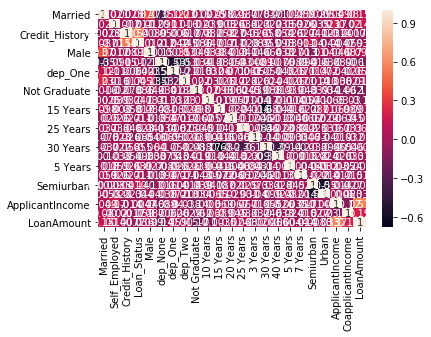

In [663]:
sns.heatmap(df_train.corr(),annot = True)

In [664]:
### model work:

In [666]:
X = df_train.drop(['Loan_ID','Loan_Status'],axis = 1)
y = df_train['Loan_Status']

In [667]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [668]:
log = LogisticRegression()
rfe = RFE(log,22)
rfe1 = rfe.fit(X,y)
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [669]:
col = X.columns[rfe.support_]
X_train = X[col]

In [670]:
[variance_inflation_factor(X_train.values, j) for j in range(1, X_train.shape[1])]

[1.2292737446483852,
 6.925757814787509,
 6.411254262491179,
 8.537937449125367,
 3.1668286006003648,
 3.181694635855579,
 1.3799642330649926,
 1.1814846219798143,
 3.1619159205969645,
 1.2234878685324997,
 1.6537861670074658,
 1.1190389408345804,
 26.57779594962352,
 1.7151106160175085,
 1.109550269333968,
 1.2073725199487215,
 2.3818804047905533,
 2.2058274187141076,
 2.973451539412761,
 1.512085099603224,
 6.849901388670648]

In [671]:
import statsmodels.api as sm
model = sm.GLM(y,sm.add_constant(X_train[col]),family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                            GLM   Df Residuals:                      591
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -272.67
Date:                Mon, 04 Mar 2019   Deviance:                       545.35
Time:                        18:55:16   Pearson chi2:                     595.
No. Iterations:                    21   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                18.8822   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Married               0.5134      0.258      1.992      0.046       0.008       1.018
Self_Employed        -0.1664      0.310     -0.536      0.592      -0.775       0.442
Credit_History        3.9459      0.411      9.596      0.000       3.140       4.752
Male                 -0.1137      0.304     -0.375      0.708      -0.709       0.481
dep_None              0.0250      0.428      0.058      0.954      -0.815       0.864
dep_One              -0.3466      0.468     -0.740      0.459      -1.264       0.571
dep_Two               0.3353      0.486      0.689      0.491      -0.618       1.288
Not Graduate         -0.3855      0.264     -1.460      0.144      -0.903       0.132
10 Years             -1.1018   5.55e+04  -1.98e-05      1.000   -1.09e+05    1.09e+05
15 Years            -21.3243   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
20 Years            -21.7618   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
25 Years            -21.6529   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
3 Years             -45.8320    5.9e+04     -0.001      0.999   -1.16e+05    1.16e+05
30 Years            -21.6682   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
40 Years            -23.0502   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
5 Years              -0.0389   5.89e+04   -6.6e-07      1.000   -1.16e+05    1.16e+05
7 Years             -21.9605   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Semiurban             0.9797      0.275      3.560      0.000       0.440       1.519
Urban                 0.2122      0.264      0.805      0.421      -0.305       0.729
ApplicantIncome    5.354e-06   2.52e-05      0.212      0.832   -4.41e-05    5.48e-05
CoapplicantIncome -5.589e-05   3.65e-05     -1.531      0.126      -0.000    1.57e-05
LoanAmount           -0.0013      0.002     -0.773      0.440      -0.005       0.002
=====================================================================================
"""

In [672]:
## 3 years,

In [673]:
X1 = df_train.drop(['Loan_ID','Loan_Status','3 Years','25 Years','20 Years','15 Years','10 Years','7 Years','5 Years','40 Years','30 Years','dep_None','dep_Two','dep_One','LoanAmount','Self_Employed','Not Graduate','Male','Urban','ApplicantIncome'],axis = 1)
y = df_train['Loan_Status']

In [674]:
log1 = LogisticRegression()
rfe2 = RFE(log1,4)
rfe2 = rfe2.fit(X1,y)
print(rfe2.support_)
print(rfe2.ranking_)

[ True  True  True  True]
[1 1 1 1]


In [675]:
col1 = X1.columns[rfe2.support_]
X_train1 = X1[col1]

In [676]:
[variance_inflation_factor(X_train1.values, j) for j in range(1, X_train1.shape[1])]

[2.696408275653157, 1.5304936681201082, 1.2853338524120639]

In [677]:
model1 = sm.GLM(y,sm.add_constant(X_train1[col1]),family = sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                            GLM   Df Residuals:                      609
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -283.76
Date:                Mon, 04 Mar 2019   Deviance:                       567.53
Time:                        18:55:31   Pearson chi2:                     610.
No. Iterations:                     5   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.0028      0.428     -7.012      0.000      -3.842      -2.163
Married               0.5585      0.216      2.580      0.010       0.134       0.983
Credit_History        3.8774      0.404      9.588      0.000       3.085       4.670
Semiurban             0.7619      0.232      3.287      0.001       0.308       1.216
CoapplicantIncome -4.944e-05   3.42e-05     -1.446      0.148      -0.000    1.76e-05
=====================================================================================
"""

In [678]:
# Predicted probabilities
X_test1 = X1[col1]
log22 = LogisticRegression()
log22.fit(X_train1, y)
y_pred = log22.predict_proba(X_test1)

In [679]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y)

In [680]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
y_pred_1.head()

,1
0,0.717076
1,0.785302
2,0.798306
3,0.777708
4,0.717076


In [681]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'status_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Loan_Status','status_Prob'], axis=1)
y_pred_final.head()

,Loan_Status,status_Prob
0,1,0.717076
1,0,0.785302
2,1,0.798306
3,1,0.777708
4,1,0.717076


In [682]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.status_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Loan_Status,status_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.717076,1,1,1,1,1,1,1,1,0,0
1,0,0.785302,1,1,1,1,1,1,1,1,0,0
2,1,0.798306,1,1,1,1,1,1,1,1,0,0
3,1,0.777708,1,1,1,1,1,1,1,1,0,0
4,1,0.717076,1,1,1,1,1,1,1,1,0,0


In [683]:
from sklearn import metrics

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Loan_Status, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.687296  0.000000  1.000000
0.1   0.1  0.716612  0.098958  0.997630
0.2   0.2  0.789902  0.354167  0.988152
0.3   0.3  0.811075  0.432292  0.983412
0.4   0.4  0.812704  0.437500  0.983412
0.5   0.5  0.812704  0.437500  0.983412
0.6   0.6  0.812704  0.447917  0.978673
0.7   0.7  0.762215  0.510417  0.876777
0.8   0.8  0.542345  0.869792  0.393365
0.9   0.9  0.312704  1.000000  0.000000


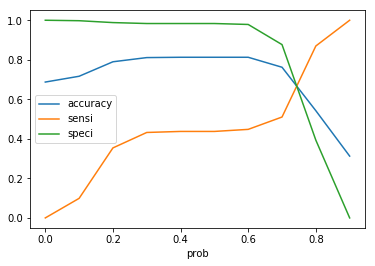

In [689]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])


In [685]:
y_pred_final['final_predicted'] = y_pred_final.status_Prob.map( lambda x: 1 if x > 0.7 else 0)

In [686]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Loan_Status, y_pred_final.final_predicted)

0.762214983713355

In [691]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
Married              614 non-null int64
Credit_History       614 non-null float64
Semiurban            614 non-null uint8
CoapplicantIncome    614 non-null float64
dtypes: float64(2), int64(1), uint8(1)
memory usage: 15.1 KB


In [690]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
